In [ ]:
# noise removal
# gaussian noise

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 28.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


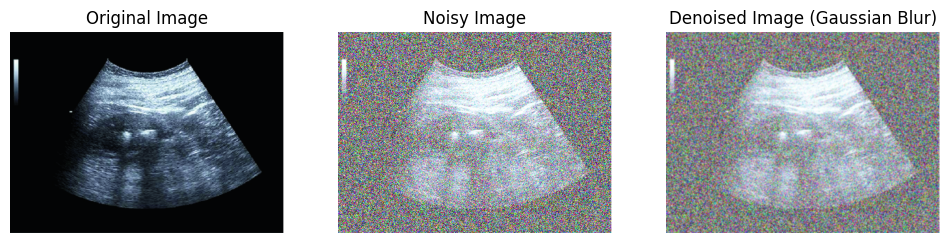

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png')

# Add Gaussian noise to the image (for demonstration purposes)
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)  # Adjust the standard deviation as needed
noisy_image = cv2.add(image, noise)

# Apply Gaussian blur to remove noise
kernel_size = (5, 5)  # Adjust the kernel size as needed
blurred_image = cv2.GaussianBlur(noisy_image, kernel_size, 0)

# Display the original image, noisy image, and denoised image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(133), plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Gaussian Blur)'), plt.axis('off')
plt.show()

In [ ]:
# impulse noise

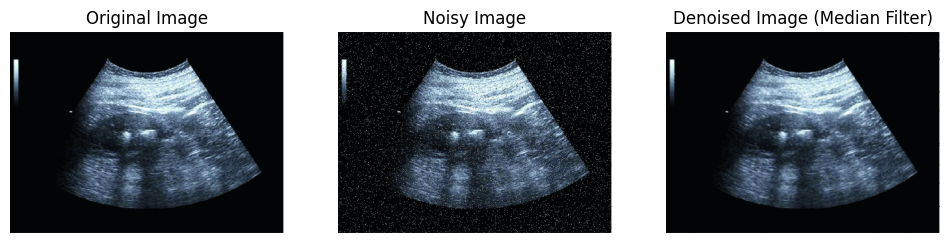

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png')

# Add impulse noise to the image (for demonstration purposes)
noise_density = 0.05  # Adjust the noise density as needed
noisy_image = image.copy()
rows, cols, _ = noisy_image.shape
num_noise_pixels = int(noise_density * rows * cols)

for _ in range(num_noise_pixels):
    x, y = np.random.randint(0, rows), np.random.randint(0, cols)
    if np.random.rand() < 0.5:
        noisy_image[x, y] = [0, 0, 0]  # Salt noise
    else:
        noisy_image[x, y] = [255, 255, 255]  # Pepper noise

# Apply median filter to remove impulse noise
kernel_size = 3  # Adjust the kernel size as needed
denoised_image = cv2.medianBlur(noisy_image, kernel_size)

# Display the original image, noisy image, and denoised image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(133), plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Median Filter)'), plt.axis('off')
plt.show()


In [ ]:
# poisson noise

<ipython-input-15-2792e1cb2635>:15: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  denoised_image = restoration.richardson_lucy(noisy_image, psf, iterations=30)


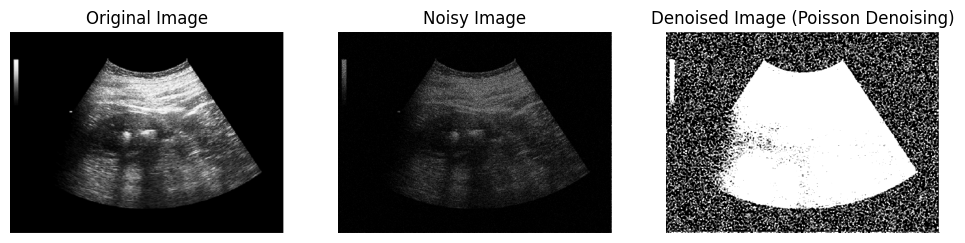

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Add Poisson noise to the image (for demonstration purposes)
lambda_ = 10  # Adjust the Poisson noise parameter (higher values mean more noise)
noisy_image = np.random.poisson((image / 255.0) * lambda_) * 255

# Apply Poisson denoising using the Richardson-Lucy deconvolution algorithm
psf = np.ones((5, 5)) / 25
denoised_image = restoration.richardson_lucy(noisy_image, psf, iterations=30)

# Display the original image, noisy image, and denoised image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(133), plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Poisson Denoising)'), plt.axis('off')
plt.show()

In [ ]:
# exponential noise

<ipython-input-16-4bd2f5ffa1cf>:13: RuntimeWarning: divide by zero encountered in log
  denoised_image = np.floor(-np.log(1 - (noisy_image / 255.0)) * scale_parameter * 255.0).astype(np.uint8)


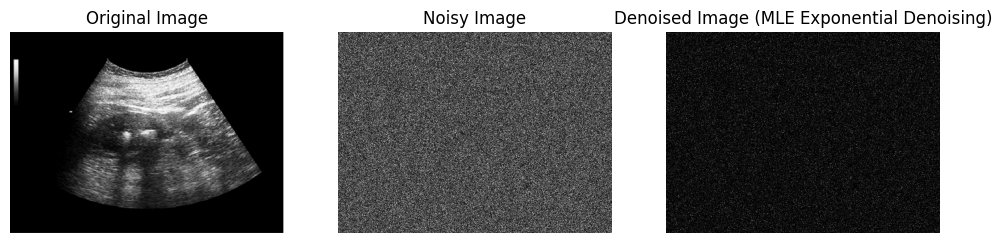

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Add exponential noise to the image (for demonstration purposes)
scale_parameter = 0.01  # Adjust the scale parameter (lambda) as needed
noisy_image = np.random.exponential(scale=1.0 / scale_parameter, size=image.shape).astype(np.uint8)

# Apply exponential noise removal using the inverse transform method (MLE)
denoised_image = np.floor(-np.log(1 - (noisy_image / 255.0)) * scale_parameter * 255.0).astype(np.uint8)

# Display the original image, noisy image, and denoised image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(133), plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (MLE Exponential Denoising)'), plt.axis('off')
plt.show()


In [ ]:
# gamma noise

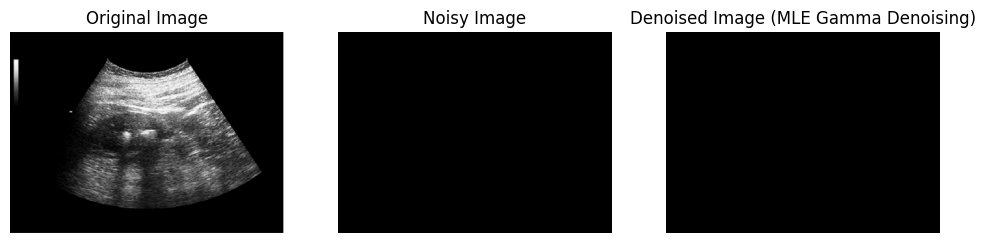

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Add gamma noise to the image (for demonstration purposes)
shape_parameter = 2.0  # Adjust the shape parameter (alpha) as needed
scale_parameter = 0.01  # Adjust the scale parameter (beta) as needed
noisy_image = np.random.gamma(shape_parameter, scale=scale_parameter, size=image.shape).astype(np.uint8)

# Apply gamma noise removal using the inverse transform method (MLE)
denoised_image = np.floor(np.power(noisy_image / 255.0, 1.0 / shape_parameter) * 255.0).astype(np.uint8)

# Display the original image, noisy image, and denoised image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(133), plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (MLE Gamma Denoising)'), plt.axis('off')
plt.show()


In [ ]:
# rayleigh noise

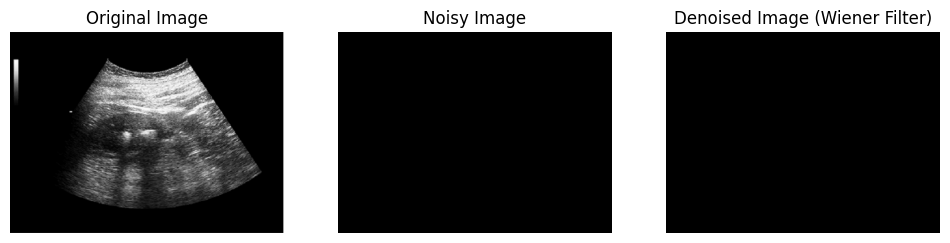

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.special import gamma

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Add Rayleigh noise to the image (for demonstration purposes)
scale_parameter = 0.1  # Adjust the scale parameter as needed
noisy_image = np.random.rayleigh(scale=scale_parameter, size=image.shape).astype(np.uint8)

# Apply Rayleigh noise removal using the Wiener filter
def wiener_filter(img, psf, noise_var):
    psf_f = np.fft.fft2(psf, s=img.shape)
    img_f = np.fft.fft2(img)
    result_f = np.conj(psf_f) / (np.abs(psf_f) ** 2 + noise_var)
    result_f *= img_f
    return np.abs(np.fft.ifft2(result_f)).astype(np.uint8)

# Define the point spread function (PSF) for Rayleigh noise (e.g., a circular PSF)
radius = 3  # Adjust the PSF size as needed
psf = np.zeros((2 * radius + 1, 2 * radius + 1))
for i in range(2 * radius + 1):
    for j in range(2 * radius + 1):
        if (i - radius) ** 2 + (j - radius) ** 2 <= radius ** 2:
            psf[i, j] = 1.0 / (np.pi * radius ** 2)  # Normalize the PSF

noise_var = scale_parameter ** 2 * (4 - np.pi) / 2  # Calculate the noise variance

denoised_image = wiener_filter(noisy_image, psf, noise_var)

# Display the original image, noisy image, and denoised image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(133), plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Wiener Filter)'), plt.axis('off')
plt.show()


In [ ]:
# uniform noise

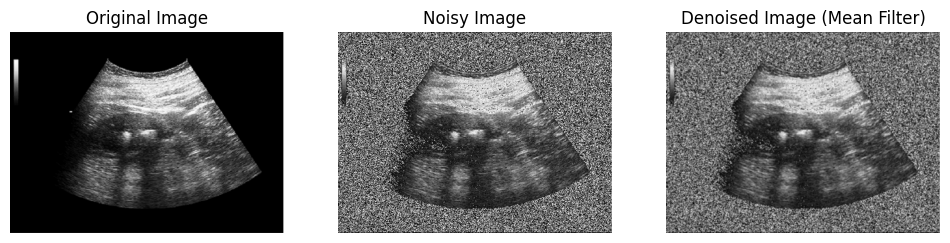

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Add uniform noise to the image (for demonstration purposes)
noise_intensity = 25  # Adjust the noise intensity as needed
noisy_image = (image + np.random.uniform(-noise_intensity, noise_intensity, image.shape)).astype(np.uint8)

# Apply uniform noise removal using a mean filter
filter_size = 3  # Adjust the filter size (kernel size) as needed
denoised_image = cv2.blur(noisy_image, (filter_size, filter_size))

# Display the original image, noisy image, and denoised image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(133), plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Mean Filter)'), plt.axis('off')
plt.show()

In [ ]:
# periodic noise

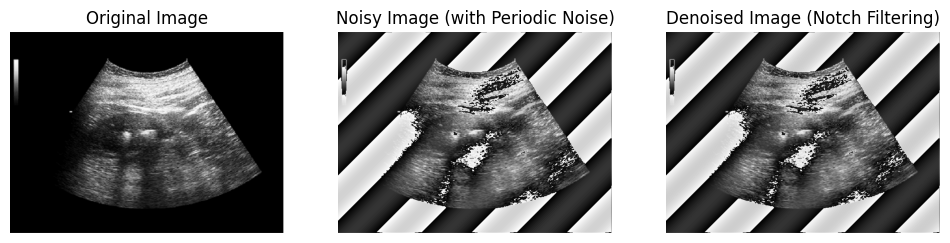

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Add periodic noise to the image (for demonstration purposes)
periodic_noise_amplitude = 50  # Adjust the noise amplitude as needed
frequency = 5  # Adjust the noise frequency as needed
rows, cols = image.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
periodic_noise = periodic_noise_amplitude * np.sin(2 * np.pi * frequency * (x + y) / (cols + rows))

# Add periodic noise to the original image
noisy_image = (image + periodic_noise).astype(np.uint8)

# Apply periodic noise removal using notch filtering in the frequency domain
def notch_filter(img, center_x, center_y, radius):
    fft_img = np.fft.fft2(img)
    fft_img_shifted = np.fft.fftshift(fft_img)

    # Create a notch filter
    rows, cols = img.shape
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    d = np.sqrt((x - center_x)**2 + (y - center_y)**2)
    notch_filter = np.ones_like(fft_img)
    notch_filter[d <= radius] = 0  # Create a notch in the filter

    # Apply the notch filter in the frequency domain
    filtered_fft = fft_img_shifted * notch_filter
    filtered_img = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fft)))

    return filtered_img

# Specify the coordinates and radius of the periodic noise
center_x = 200  # Adjust these coordinates based on the location of the noise
center_y = 200
radius = 10  # Adjust the radius based on the size of the noise pattern

# Apply the notch filter to remove the periodic noise
denoised_image = notch_filter(noisy_image, center_x, center_y, radius)

# Display the original image, noisy image, and denoised image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (with Periodic Noise)'), plt.axis('off')
plt.subplot(133), plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Notch Filtering)'), plt.axis('off')
plt.show()